In [27]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [28]:
#Téléchargement des données de Yahoo Finance
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA','META']
rawdata = yf.download(tickers, start='2014-01-01', end='2024-01-01')
data = rawdata["Close"]
for i in tickers:
    Changes = data.pct_change().dropna()

C:\Users\Ribak\AppData\Local\Temp\ipykernel_25192\47720459.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  rawdata = yf.download(tickers, start='2014-01-01', end='2024-01-01')
[*********************100%***********************]  6 of 6 completed


In [29]:
#Attribuer un portfolio avec un poids égal pour chaque action
weight = np.array([1/len(tickers)]*len(tickers))
#On veut aussi un portfolie non vide
portfolio_value = 100000

In [30]:
#calcul du retour de notre portfolio 
returns = (Changes * weight).sum(axis=1)
print(returns)

Date
2014-01-03   -0.007695
2014-01-06    0.003275
2014-01-07    0.009949
2014-01-08    0.003090
2014-01-09   -0.012205
                ...   
2023-12-22   -0.001259
2023-12-26    0.002952
2023-12-27    0.002940
2023-12-28   -0.004250
2023-12-29   -0.007895
Length: 2515, dtype: float64


In [31]:
#calcul du retour sur différents horizons
days = 7
range_returns = returns.rolling(window=days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2014-01-13   -0.024681
2014-01-14    0.028546
2014-01-15    0.034920
2014-01-16    0.031463
2014-01-17    0.019239
                ...   
2023-12-22    0.031162
2023-12-26    0.032718
2023-12-27    0.027707
2023-12-28    0.011539
2023-12-29   -0.004437
Length: 2509, dtype: float64


In [32]:
#0.99 intervalle de confiance
confidence_level = 0.99
VaR = -np.percentile(range_returns, (1 - confidence_level) * 100)*portfolio_value
print(VaR)

11166.343816901192


In [33]:
# Calcul du Value at Risk (VaR) à un niveau de confiance de 95%
confidence_level = 0.95
VaR = -np.percentile(Changes[i], (1 - confidence_level) * 100)
print("We expect to loose no more than" ,round(VaR*100), "% of the position over the next day with a confidence level of", confidence_level*100, "%")

We expect to loose no more than 3 % of the position over the next day with a confidence level of 95.0 %


<Axes: ylabel='Count'>

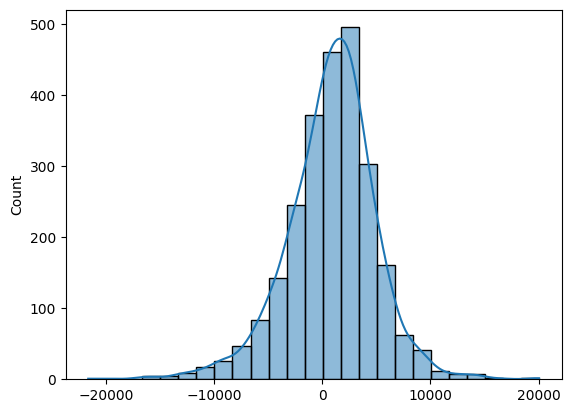

In [34]:
#Graph de la distribution des rendements
range_returns_dollars = range_returns * portfolio_value
sns.histplot(range_returns_dollars, bins=25, kde=True)


Help on function lineplot in module seaborn.relational:

lineplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    units=None,
    weights=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    dashes=True,
    markers=None,
    style_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    seed=None,
    orient='x',
    sort=True,
    err_style='band',
    err_kws=None,
    legend='auto',
    ci='deprecated',
    ax=None,
    **kwargs
)
    Draw a line plot with possibility of several semantic groupings.

    The relationship between `x` and `y` can be shown for different subsets
    of the data using the `hue`, `size`, and `style` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this s

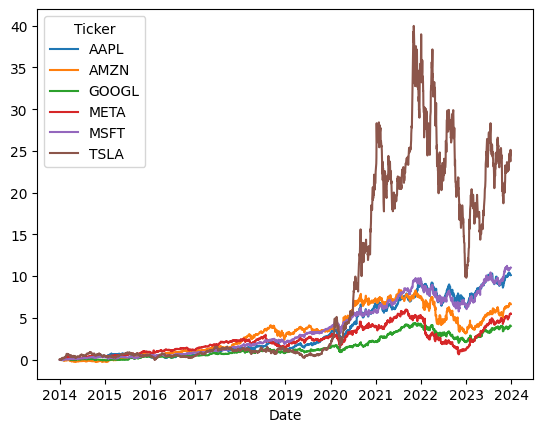

In [38]:

cumulative_returns = (1 + Changes).cumprod() - 1
sns.lineplot(data=cumulative_returns, dashes=False)
help(sns.lineplot)

